# Associations between learning parameters and transdiagnostic factors (+ distancing)

Having fit all 8 models, we now wish to dig more into the differences in training/test phase learning rates and temperature, and whether they are associated with transdiagnostic psychiatric symptom factor scores, or by the distancing manipulation. 

To do so we use Bayesian generalised linear models (GLMs) to quantify the associations between individual-level posterior mean parameter values (obtained from MCMC), and the various variables of interest, controlling for age, sex, and digit span (this approach was [preregistered](https://osf.io/fd4qu)). Specifically, Gamma family GLMs with log-link functions were used in models with learning rates as the response (as the alphas are highly positively skewed, and bounded by 0), while standard Gaussian linear regressions used to relate temperatures to the variables of interest (as these distributions were more Normal).

### Setup

#### Python dependencies

In [1]:
import os
os.chdir('..')
    # may need to be run initially if working directory is the notebook folder
%load_ext rpy2.ipython

#### Install pstpipeline R package & define colour palettes

In [2]:
%%R
remotes::install_github(
    "qdercon/pstpipeline", 
    update = "always",
    quiet = TRUE
)
# cmdstanr::set_cmdstan_path("/root/cmdstan-2.28.1")
cmdstanr::set_cmdstan_path("/home/qd01/cmdstan/cmdstan-2.28.1")
options(mc.cores = 4, width = 120)
    # number of chains to run in parallel + R console output width
    
# colour palattes
train_2a_pal <- c("#FFC9B5", "#B1DDF1", "#987284")
train_1a_pal <- c("#539987", "#F7AF9D")
test_2a_pal <- c("#648767", "#95a7ce", "#3d5a80")
test_1a_pal <- c("#243119", "#846267")
    
# run to use additional fonts outside of Docker image

# install.packages("showtext")
# sysfonts::font_add_google("Open Sans", "Open Sans")
# showtext::showtext_auto()

R[write to console]: CmdStan path set to: /home/qd01/cmdstan/cmdstan-2.28.1



## Model comparisons

In [3]:
%%R
loo_obj_train_1a_nd <- readRDS("outputs/cmdstan/1a/model_fits/non-distanced/fit_pst_training_1a_mcmc_80000_loo_obj.RDS")
loo_obj_train_2a_nd <- readRDS("outputs/cmdstan/2a/model_fits/non-distanced/fit_pst_training_2a_mcmc_80000_loo_obj.RDS")
train_nd_comp <- loo::loo_compare(loo_obj_train_1a_nd, loo_obj_train_2a_nd)

loo_obj_train_1a_dis <- readRDS("outputs/cmdstan/1a/model_fits/distanced/fit_pst_training_1a_mcmc_80000_loo_obj.RDS")
loo_obj_train_2a_dis <- readRDS("outputs/cmdstan/2a/model_fits/distanced/fit_pst_training_2a_mcmc_80000_loo_obj.RDS")
train_dis_comp <- loo::loo_compare(loo_obj_train_1a_dis, loo_obj_train_2a_dis)

loo_obj_test_1a_nd <- readRDS("outputs/cmdstan/1a_test/model_fits/non-distanced/fit_pst_test_1a_mcmc_80000_loo_obj.RDS")
loo_obj_test_2a_nd <- readRDS("outputs/cmdstan/2a_test/model_fits/non-distanced/fit_pst_test_2a_mcmc_80000_loo_obj.RDS")
test_nd_comp <- loo::loo_compare(loo_obj_test_1a_nd, loo_obj_test_2a_nd)

loo_obj_test_1a_dis <- readRDS("outputs/cmdstan/1a_test/model_fits/distanced/fit_pst_test_1a_mcmc_80000_loo_obj.RDS")
loo_obj_test_2a_dis <- readRDS("outputs/cmdstan/2a_test/model_fits/distanced/fit_pst_test_2a_mcmc_80000_loo_obj.RDS")
test_dis_comp <- loo::loo_compare(loo_obj_test_1a_dis, loo_obj_test_2a_dis)

In [4]:
%%R
print(train_nd_comp, digits = 1, simplify = FALSE)
print(train_dis_comp, digits = 1, simplify = FALSE)
print(test_nd_comp, digits = 1, simplify = FALSE)
print(test_dis_comp, digits = 1, simplify = FALSE)

       elpd_diff se_diff  elpd_loo se_elpd_loo p_loo    se_p_loo looic    se_looic
model2      0.0       0.0 -93022.8   1031.7      1088.4     18.1 186045.6   2063.5
model1   -802.3      82.4 -93825.1   1029.7       835.4     19.1 187650.1   2059.5
       elpd_diff se_diff  elpd_loo se_elpd_loo p_loo    se_p_loo looic    se_looic
model2      0.0       0.0 -86700.6   1089.3      1111.8     19.2 173401.3   2178.6
model1   -709.2      77.0 -87409.9   1090.8       851.3     17.5 174819.8   2181.6
       elpd_diff se_diff   elpd_loo  se_elpd_loo p_loo     se_p_loo  looic     se_looic 
model2       0.0       0.0 -109871.7    1137.4      1143.5      19.9  219743.5    2274.8
model1    -921.9      88.8 -110793.6    1130.9       835.0      15.9  221587.3    2261.9
       elpd_diff se_diff   elpd_loo  se_elpd_loo p_loo     se_p_loo  looic     se_looic 
model2       0.0       0.0 -102663.1    1199.4      1138.9      20.2  205326.2    2398.9
model1    -760.1      87.0 -103423.2    1200.3       829.

## Parameter distributions

In all the plots below, we drop observations from individuals with *any* of the parameters of interest with high rhats (> 1.1) or low bulk/tail effective sample sizes (n < 100). These are both metrics of poor mixing across the chains, and only affects a few individuals per model. This can be adjusted using the ```rhat_upper``` and ```ess_lower``` arguments to the ```plot_raincloud()``` and ```parameter_glm()``` functions.

In all plots that follow, the boxplot boxes represent the 95% highest density interval (HDI) of posterior distributions, and their lines the 99% HDI - this can be controlled via the ```cred``` argument.

### Training

#### 1-alpha

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.



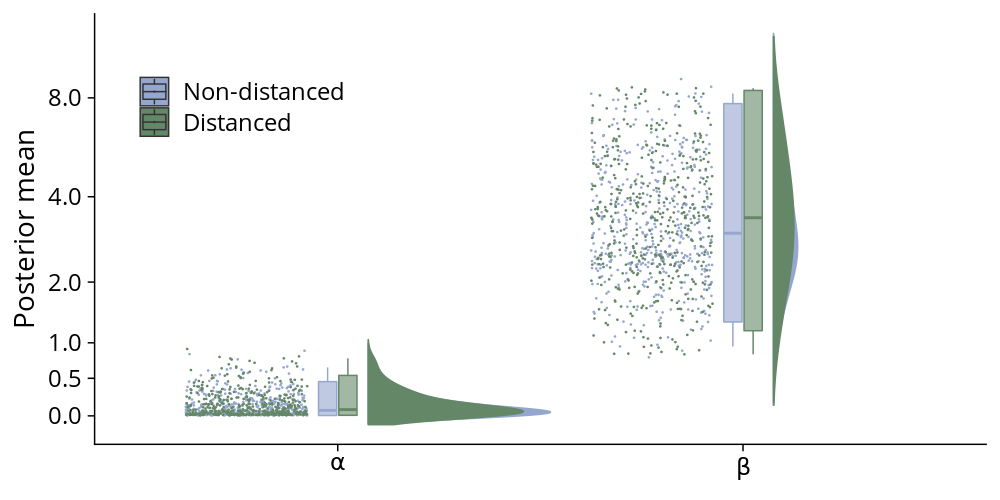

In [5]:
%%R -w 10 -h 5 --units in -r 100
raw_df_nd_1a <- readRDS("outputs/cmdstan/1a/model_fits/non-distanced/fit_pst_training_1a_mcmc_80000_raw_df.RDS")
raw_df_dis_1a <- readRDS("outputs/cmdstan/1a/model_fits/distanced/fit_pst_training_1a_mcmc_80000_raw_df.RDS")
summary_nd_1a <- readRDS("outputs/cmdstan/1a/model_fits/non-distanced/fit_pst_training_1a_mcmc_80000_summary.RDS")
summary_dis_1a <- readRDS("outputs/cmdstan/1a/model_fits/distanced/fit_pst_training_1a_mcmc_80000_summary.RDS")

pstpipeline::plot_raincloud(
    list(summary_nd_1a, summary_dis_1a), list(raw_df_nd_1a, raw_df_dis_1a), by = "distanced", 
    legend_title = NULL, legend_labels = c("Non-distanced", "Distanced"), legend_pos = c(0.05, 0.8), 
    cred = c(0.95, 0.99), flip = FALSE, pal = c("#95A7CE", "#648767"), font = "Open Sans", font_size = 20
)

#### 2-alpha

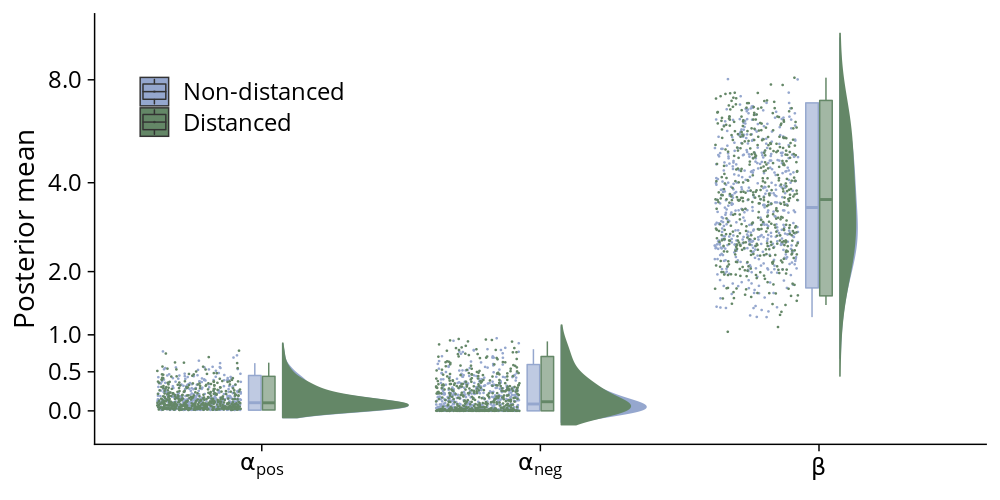

In [6]:
%%R -w 10 -h 5 --units in -r 100
raw_df_nd_2a <- readRDS("outputs/cmdstan/2a/model_fits/non-distanced/fit_pst_training_2a_mcmc_80000_raw_df.RDS")
raw_df_dis_2a <- readRDS("outputs/cmdstan/2a/model_fits/distanced/fit_pst_training_2a_mcmc_80000_raw_df.RDS")
summary_nd_2a <- readRDS("outputs/cmdstan/2a/model_fits/non-distanced/fit_pst_training_2a_mcmc_80000_summary.RDS")
summary_dis_2a <- readRDS("outputs/cmdstan/2a/model_fits/distanced/fit_pst_training_2a_mcmc_80000_summary.RDS")

pstpipeline::plot_raincloud(
    list(summary_nd_2a, summary_dis_2a), list(raw_df_nd_2a, raw_df_dis_2a), by = "distanced", 
    legend_title = NULL, legend_labels = c("Non-distanced", "Distanced"), legend_pos = c(0.05, 0.8), 
    cred = c(0.95, 0.99), flip = FALSE, pal = c("#95A7CE", "#648767"), font = "Open Sans", font_size = 20
)

### Test

#### 1-alpha

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.



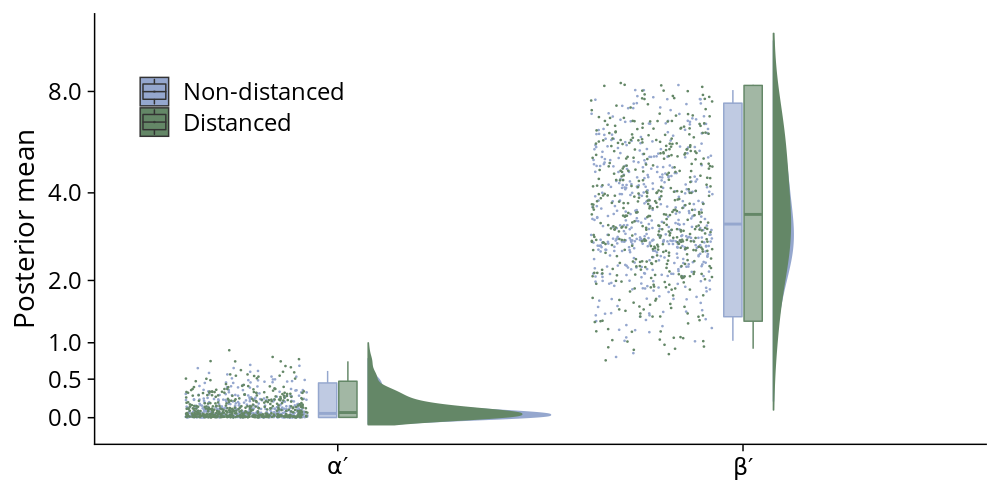

In [7]:
%%R -w 10 -h 5 --units in -r 100
raw_df_nd_1a_test <- readRDS("outputs/cmdstan/1a_test/model_fits/non-distanced/fit_pst_test_1a_mcmc_80000_raw_df.RDS")
raw_df_dis_1a_test <- readRDS("outputs/cmdstan/1a_test/model_fits/distanced/fit_pst_test_1a_mcmc_80000_raw_df.RDS")
summary_nd_1a_test <- readRDS("outputs/cmdstan/1a_test/model_fits/non-distanced/fit_pst_test_1a_mcmc_80000_summary.RDS")
summary_dis_1a_test <- readRDS("outputs/cmdstan/1a_test/model_fits/distanced/fit_pst_test_1a_mcmc_80000_summary.RDS")

pstpipeline::plot_raincloud(
    list(summary_nd_1a_test, summary_dis_1a_test), list(raw_df_nd_1a_test$test, raw_df_dis_1a_test$test), 
    test = TRUE, by = "distanced", legend_title = NULL, legend_labels = c("Non-distanced", "Distanced"), 
    legend_pos = c(0.05, 0.8), cred = c(0.95, 0.99), flip = FALSE, pal = c("#95A7CE", "#648767"), 
    font = "Open Sans", font_size = 20
)

#### 2-alpha

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.



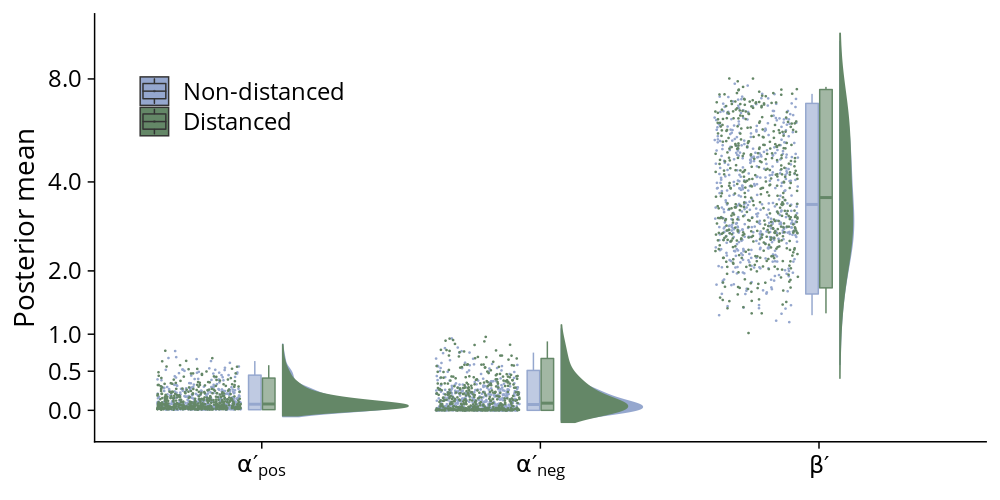

In [8]:
%%R -w 10 -h 5 --units in -r 100
raw_df_nd_2a_test <- readRDS("outputs/cmdstan/2a_test/model_fits/non-distanced/fit_pst_test_2a_mcmc_80000_raw_df.RDS")
raw_df_dis_2a_test <- readRDS("outputs/cmdstan/2a_test/model_fits/distanced/fit_pst_test_2a_mcmc_80000_raw_df.RDS")
summary_nd_2a_test <- readRDS("outputs/cmdstan/2a_test/model_fits/non-distanced/fit_pst_test_2a_mcmc_80000_summary.RDS")
summary_dis_2a_test <- readRDS("outputs/cmdstan/2a_test/model_fits/distanced/fit_pst_test_2a_mcmc_80000_summary.RDS")

pstpipeline::plot_raincloud(
    list(summary_nd_2a_test, summary_dis_2a_test), list(raw_df_nd_2a_test$test, raw_df_dis_2a_test$test), 
    test = TRUE, by = "distanced", legend_title = NULL, legend_labels = c("Non-distanced", "Distanced"), 
    legend_pos = c(0.05, 0.8), cred = c(0.95, 0.99), flip = FALSE, pal = c("#95A7CE", "#648767"), 
    font = "Open Sans", font_size = 20
)

### Transdiagnostic factor distributions

As we have set ```rhat_upper = Inf``` and ```ess_lower = 0```, all 935 individuals' factor scores are plotted here.

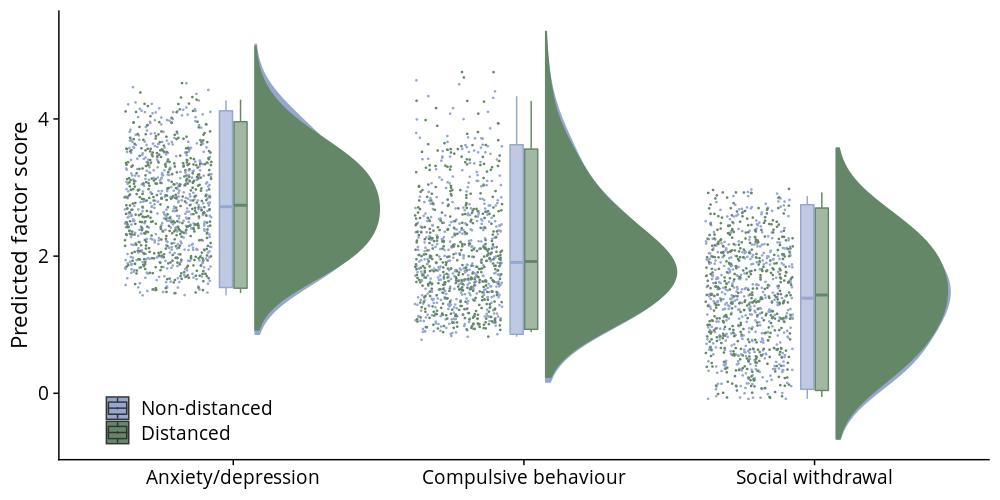

In [9]:
%%R -w 10 -h 5 --units in -r 100
factor_scores <- read.csv("outputs/factor_prediction/all_935_predicted_factor_scores.csv")[-1]
pstpipeline::plot_raincloud(
    list(summary_nd_2a, summary_dis_2a), list(raw_df_nd_2a, raw_df_dis_2a), type = "factor", 
    by = "distanced", rhat_upper = Inf, ess_lower = 0, legend_title = NULL, 
    legend_labels = c("Non-distanced", "Distanced"), legend_pos = c(0.05, 0.1), 
    factor_scores = factor_scores, cred = c(0.95, 0.99), flip = FALSE, 
    pal = c("#95A7CE", "#648767"), font = "Open Sans", font_size = 16
)

## Associations between learning parameters and transdiagnostic factors

Our primary preregistered analysis was to assess the associations between individual-level posterior means for each of the free parameters (i.e., alphas and betas estimated from the learning models fit using MCMC) and scores on the three transdiagnostic symptom dimensions identified by [Gillan et al (2016)](https://elifesciences.org/articles/11305), as predicted from a subset (*n*=78) of the original 209 questionnaire questions. 

In these analyses (and all those which follow), we use adjusted Bayesian linear regression models to quantify the association between inverse temperature and the factor scores, and adjusted Bayesian gamma family generalised linear models (GLMs) with log link functions to quantify the association between the learning rate(s) and the factor scores. This latter choice is due to the fact that the response variables (i.e., learning rates) are highly positively skewed, and bounded by zero (as can be seen in the raincloud plots above), both characteristics of the gamma distribution. Note that the (exponentiated) coefficients from these models are interpreted slightly differently: the **estimated % increase** in the parameter value for a *unit increase* in the variable of interest (as compared to the **estimated mean difference** in the parameter value, for a *unit increase* in the variable of interest).

In all these models we also adjust for four covariates: age, sex, and digit span (a simple metric of working memory), plus distancing (as though the parameter distributions are similar as seen above, the learning models were fit seperately for the distanced and non-distanced groups).

### Training

In [10]:
%%R
AD_1a_train <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_1a, summary_dis_1a),
    raw_df = list(raw_df_nd_1a, raw_df_dis_1a),
    var_of_interest = "AD",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
CB_1a_train <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_1a, summary_dis_1a),
    raw_df = list(raw_df_nd_1a, raw_df_dis_1a),
    var_of_interest = "Compul",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
SW_1a_train <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_1a, summary_dis_1a),
    raw_df = list(raw_df_nd_1a, raw_df_dis_1a),
    var_of_interest = "SW",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Compiling Stan program...



Running MCMC with 4 parallel chains...|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/

Chain 1 finished in 6.5 seconds.
Chain 2 finished in 6.5 seconds.
Chain 3 finished in 6.4 seconds.
Chain 4 finished in 6.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.5 seconds.
Total execution time: 6.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.6 seconds.


R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 6.6 seconds.
Chain 4 finished in 6.5 seconds.
Chain 1 finished in 6.8 seconds.
Chain 2 finished in 6.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.7 seconds.
Total execution time: 7.0 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.5 seconds.
Chain 4 finished in 1.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.7 seconds.


R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.4 seconds.
Chain 2 finished in 6.5 seconds.
Chain 3 finished in 6.5 seconds.
Chain 4 finished in 6.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.4 seconds.
Total execution time: 6.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.6 seconds.


In [11]:
%%R
AD_2a_train <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a, summary_dis_2a),
    raw_df = list(raw_df_nd_2a, raw_df_dis_2a),
    var_of_interest = "AD",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
CB_2a_train <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a, summary_dis_2a),
    raw_df = list(raw_df_nd_2a, raw_df_dis_2a),
    var_of_interest = "Compul",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
SW_2a_train <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a, summary_dis_2a),
    raw_df = list(raw_df_nd_2a, raw_df_dis_2a),
    var_of_interest = "SW",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.8 seconds.
Chain 2 finished in 6.9 seconds.
Chain 3 finished in 7.0 seconds.
Chain 4 finished in 7.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.9 seconds.
Total execution time: 7.2 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.3 seconds.
Chain 3 finished in 6.4 seconds.
Chain 4 finished in 6.3 seconds.
Chain 2 finished in 6.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.4 seconds.
Total execution time: 6.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 6.9 seconds.
Chain 4 finished in 6.8 seconds.
Chain 3 finished in 7.0 seconds.
Chain 1 finished in 7.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 7.1 seconds.
Total execution time: 7.6 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 6.5 seconds.
Chain 3 finished in 6.4 seconds.
Chain 1 finished in 6.7 seconds.
Chain 4 finished in 6.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.6 seconds.
Total execution time: 6.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.8 seconds.
Chain 2 finished in 6.9 seconds.
Chain 3 finished in 6.9 seconds.
Chain 4 finished in 6.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.9 seconds.
Total execution time: 7.1 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.4 seconds.
Chain 4 finished in 6.3 seconds.
Chain 2 finished in 6.5 seconds.
Chain 3 finished in 7.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.6 seconds.
Total execution time: 7.5 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.5 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.7 seconds.


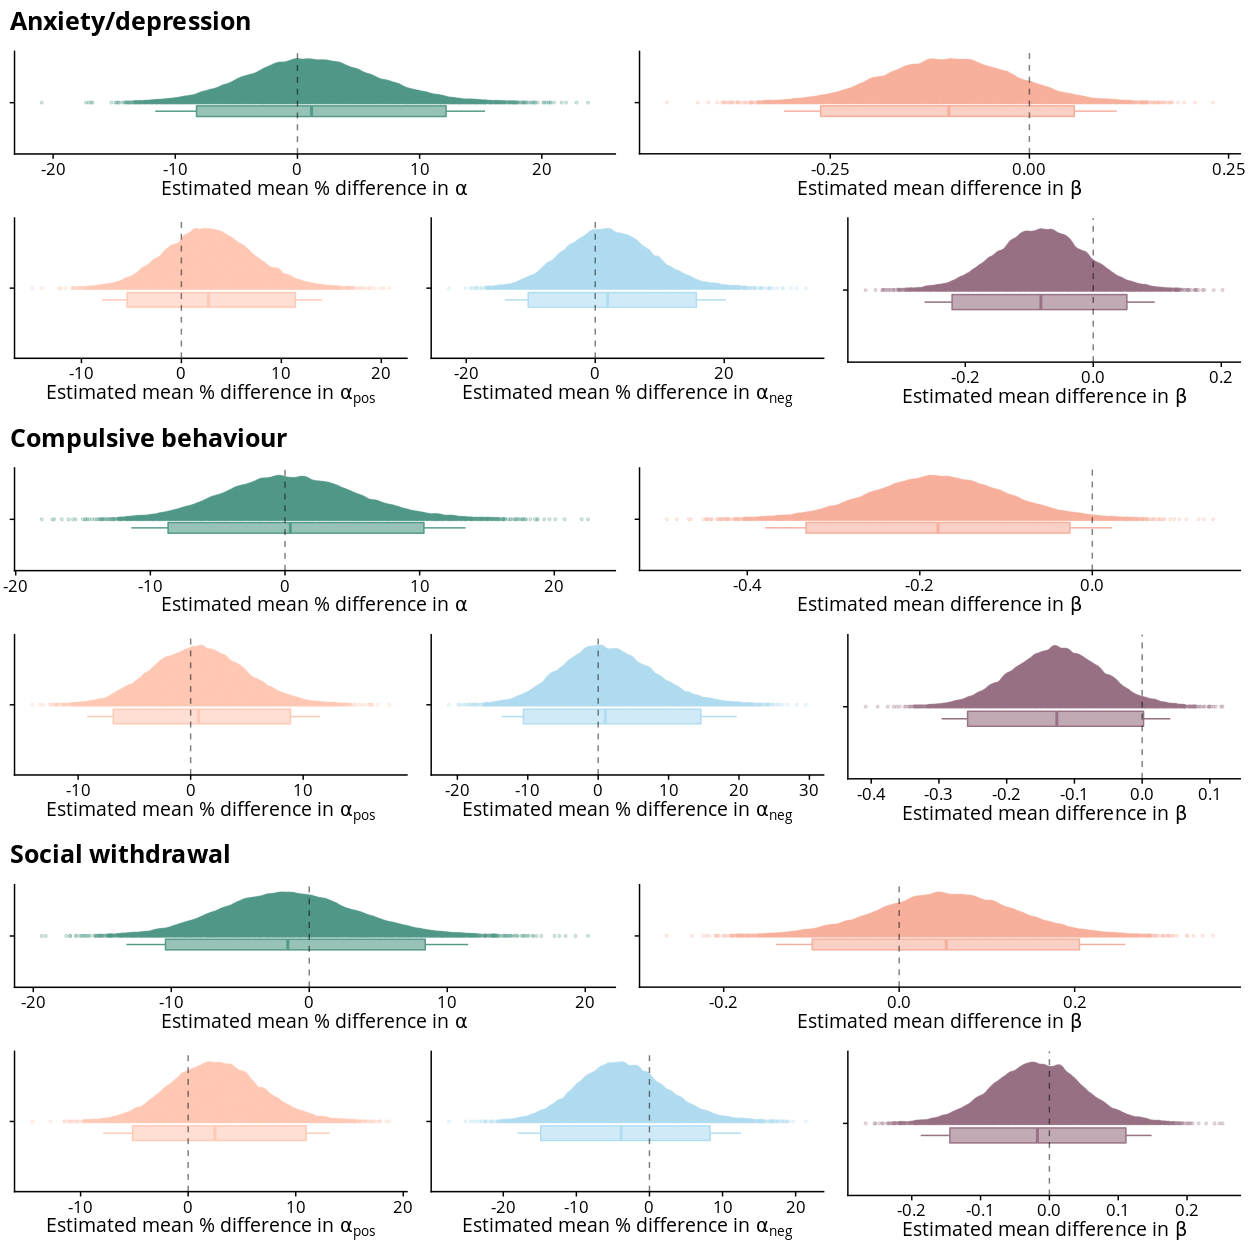

In [12]:
%%R -w 12.5 -h 12.5 --units in -r 100
# install.packages("vipor", quiet = TRUE)
AD_plt_1a <- pstpipeline::plot_glm(
    AD_1a_train, plot_var = "AD", ovrll_title = "Anxiety/depression", 
    title_font_size = 18, title_rel_ht = c(0.25, 1), font = "Open Sans", 
    font_size = 14, pal = train_1a_pal
)
CB_plt_1a <- pstpipeline::plot_glm(
    CB_1a_train, plot_var = "Compul", ovrll_title = "Compulsive behaviour", 
    title_font_size = 18, title_rel_ht = c(0.25, 1), font = "Open Sans", 
    font_size = 14, pal = train_1a_pal
)
SW_plt_1a <- pstpipeline::plot_glm(
    SW_1a_train, plot_var = "SW", ovrll_title = "Social withdrawal",
    title_font_size = 18, title_rel_ht = c(0.25, 1), font = "Open Sans", 
    font_size = 14, pal = train_1a_pal
)

AD_plt_2a <- pstpipeline::plot_glm(
    AD_2a_train, plot_var = "AD", font = "Open Sans", font_size = 14, 
    pal = train_2a_pal
)
CB_plt_2a <- pstpipeline::plot_glm(
    CB_2a_train, plot_var = "Compul", font = "Open Sans", font_size = 14, 
    pal = train_2a_pal
)
SW_plt_2a <- pstpipeline::plot_glm(
    SW_2a_train, plot_var = "SW", font = "Open Sans", font_size = 14, 
    pal = train_2a_pal
)

cowplot::plot_grid(
    cowplot::plot_grid(AD_plt_1a, AD_plt_2a, nrow = 2), 
    cowplot::plot_grid(CB_plt_1a, CB_plt_2a, nrow = 2), 
    cowplot::plot_grid(SW_plt_1a, SW_plt_2a, nrow = 2), 
    nrow = 3
)

It seems that, overall, there is little evidence of any association between any of the transdiagnostic factors and the learning rate parameters. However, there is some evidence, particularly from the single learning-rate model, that higher scores on the compulsive behaviour factor are associated with lower inverse temperatures, on average, which indicates participants who scored highly on this factor are more stochastic (i.e., random) in their choices throughout training. 

### Test

In [13]:
%%R
AD_1a_test <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_1a_test, summary_dis_1a_test),
    raw_df = list(raw_df_nd_1a_test$test, raw_df_dis_1a_test$test),
    var_of_interest = "AD",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
CB_1a_test <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_1a_test, summary_dis_1a_test),
    raw_df = list(raw_df_nd_1a_test$test, raw_df_dis_1a_test$test),
    var_of_interest = "Compul",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
SW_1a_test <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_1a_test, summary_dis_1a_test),
    raw_df = list(raw_df_nd_1a_test$test, raw_df_dis_1a_test$test),
    var_of_interest = "SW",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.6 seconds.
Chain 3 finished in 6.5 seconds.
Chain 2 finished in 6.7 seconds.
Chain 4 finished in 6.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.6 seconds.
Total execution time: 6.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.7 seconds.


R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 6.5 seconds.
Chain 3 finished in 6.4 seconds.
Chain 1 finished in 6.9 seconds.
Chain 4 finished in 7.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.8 seconds.
Total execution time: 7.6 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.8 seconds.


R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.4 seconds.
Chain 3 finished in 6.4 seconds.
Chain 2 finished in 6.6 seconds.
Chain 4 finished in 6.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.5 seconds.
Total execution time: 6.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.7 seconds.


In [14]:
%%R
AD_2a_test <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a_test, summary_dis_2a_test),
    raw_df = list(raw_df_nd_2a_test$test, raw_df_dis_2a_test$test),
    var_of_interest = "AD",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
CB_2a_test <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a_test, summary_dis_2a_test),
    raw_df = list(raw_df_nd_2a_test$test, raw_df_dis_2a_test$test),
    var_of_interest = "Compul",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
SW_2a_test <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a_test, summary_dis_2a_test),
    raw_df = list(raw_df_nd_2a_test$test, raw_df_dis_2a_test$test),
    var_of_interest = "SW",
    covariates = c("age", "sex", "digit_span", "distanced"),
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 7.0 seconds.
Chain 3 finished in 7.3 seconds.
Chain 4 finished in 7.1 seconds.
Chain 1 finished in 7.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 7.2 seconds.
Total execution time: 7.6 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.4 seconds.
Chain 2 finished in 6.4 seconds.
Chain 4 finished in 6.3 seconds.
Chain 3 finished in 6.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.4 seconds.
Total execution time: 6.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.5 seconds.
Chain 3 finished in 1.5 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.7 seconds.


R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 7.1 seconds.
Chain 2 finished in 7.4 seconds.
Chain 4 finished in 7.4 seconds.
Chain 1 finished in 8.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 7.5 seconds.
Total execution time: 8.1 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 6.4 seconds.
Chain 2 finished in 6.6 seconds.
Chain 3 finished in 6.6 seconds.
Chain 1 finished in 6.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.7 seconds.
Total execution time: 7.1 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.7 seconds.


R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 7.1 seconds.
Chain 3 finished in 7.3 seconds.
Chain 4 finished in 7.7 seconds.
Chain 1 finished in 8.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 7.7 seconds.
Total execution time: 8.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.4 seconds.
Chain 2 finished in 6.3 seconds.
Chain 3 finished in 6.5 seconds.
Chain 4 finished in 6.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.4 seconds.
Total execution time: 6.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.7 seconds.


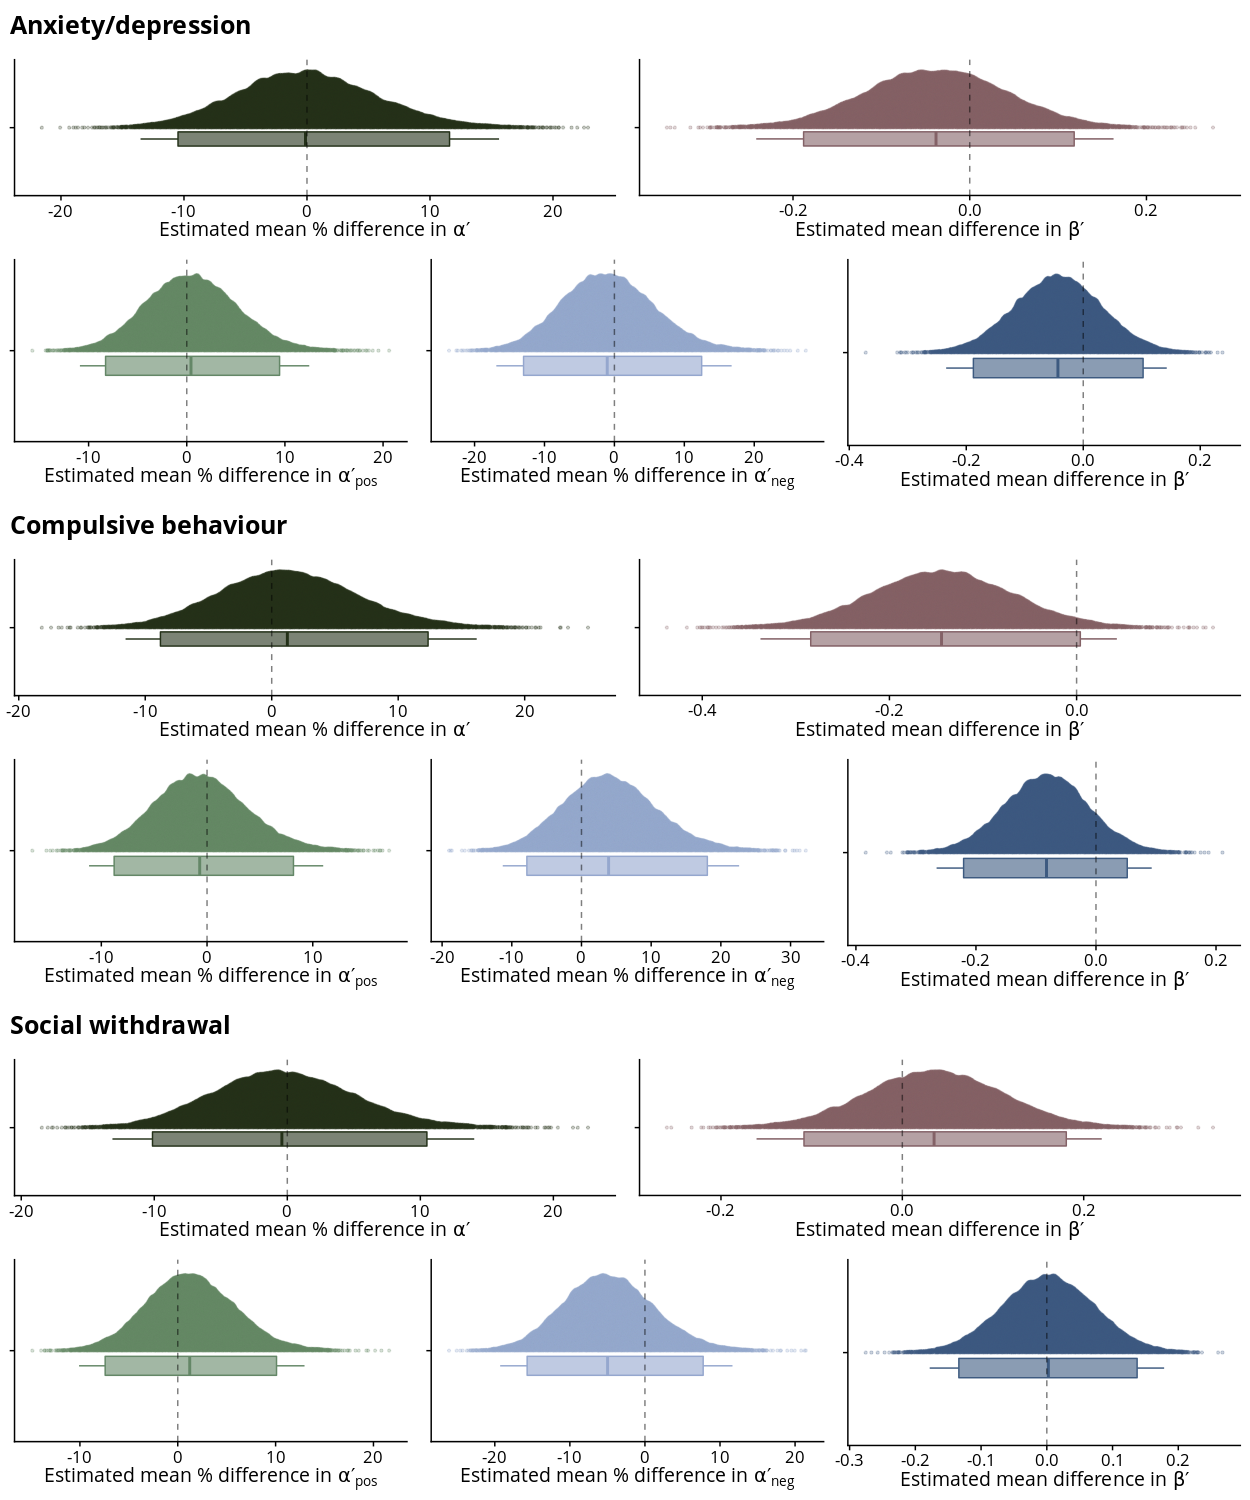

In [15]:
%%R -w 12.5 -h 15 --units in -r 100
AD_plt_1a_test <- pstpipeline::plot_glm(
    AD_1a_test, plot_var = "AD", test = TRUE, 
    ovrll_title = "Anxiety/depression", title_font_size = 18, 
    title_rel_ht = c(0.25, 1), font = "Open Sans", font_size = 14, 
    pal = test_1a_pal
)
CB_plt_1a_test <- pstpipeline::plot_glm(
    CB_1a_test, plot_var = "Compul", test = TRUE, 
    ovrll_title = "Compulsive behaviour", title_font_size = 18, 
    title_rel_ht = c(0.25, 1), font = "Open Sans", font_size = 14, 
    pal = test_1a_pal
)
SW_plt_1a_test <- pstpipeline::plot_glm(
    SW_1a_test, plot_var = "SW", test = TRUE,
    ovrll_title = "Social withdrawal", title_font_size = 18, 
    title_rel_ht = c(0.25, 1), font = "Open Sans", font_size = 14, 
    pal = test_1a_pal
)

AD_plt_2a_test <- pstpipeline::plot_glm(
    AD_2a_test, plot_var = "AD", test = TRUE, font = "Open Sans", 
    font_size = 14, pal = test_2a_pal
)
CB_plt_2a_test <- pstpipeline::plot_glm(
    CB_2a_test, plot_var = "Compul", test = TRUE, font = "Open Sans", 
    font_size = 14, pal = test_2a_pal
)
SW_plt_2a_test <- pstpipeline::plot_glm(
    SW_2a_test, plot_var = "SW", test = TRUE, font = "Open Sans", 
    font_size = 14, pal = test_2a_pal
)

cowplot::plot_grid(
    cowplot::plot_grid(AD_plt_1a_test, AD_plt_2a_test, nrow = 2), 
    cowplot::plot_grid(CB_plt_1a_test, CB_plt_2a_test, nrow = 2), 
    cowplot::plot_grid(SW_plt_1a_test, SW_plt_2a_test, nrow = 2), 
    nrow = 3
)

Unsuprisingly given that the test phase parameters can be interpreted as the best-fitting parameters at the end of training to the test choices, broadly null associations are seen between higher scores on the transdiagnostic factors and the learning rate parameters. That said, there is again some evidence that higher compulsivity scores are associated with more stochastic choices in the test phase, though the evidence for this appears weaker than for the training phase.

In [16]:
%%R
transdiag_models <- list()
transdiag_models$simple <- list()
transdiag_models$simple$AD <- AD_1a_train
transdiag_models$simple$CB <- CB_1a_train
transdiag_models$simple$SW <- SW_1a_train
transdiag_models$gainloss <- list()
transdiag_models$gainloss$AD <- AD_2a_train
transdiag_models$gainloss$CB <- CB_2a_train
transdiag_models$gainloss$SW <- SW_2a_train

transdiag_models$simple_test <- list()
transdiag_models$simple_test$AD <- AD_1a_test
transdiag_models$simple_test$CB <- CB_1a_test
transdiag_models$simple_test$SW <- SW_1a_test
transdiag_models$gainloss_test <- list()
transdiag_models$gainloss_test$AD <- AD_2a_test
transdiag_models$gainloss_test$CB <- CB_2a_test
transdiag_models$gainloss_test$SW <- SW_2a_test

dir.create("outputs/cmdstan/outcome_glms")
saveRDS(transdiag_models, "outputs/cmdstan/outcome_glms/transdiag_models.RDS")

## Associations between learning parameters and distancing

### Training

In [17]:
%%R
dis_comp_1a_train <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_1a, summary_dis_1a),
    raw_df = list(raw_df_nd_1a, raw_df_dis_1a),
    var_of_interest = "distanced",
    covariates = c("age", "sex", "digit_span"),
    iter_warmup = 2000, iter_sampling = 10000
)
dis_comp_2a_train <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a, summary_dis_2a),
    raw_df = list(raw_df_nd_2a, raw_df_dis_2a),
    var_of_interest = "distanced",
    covariates = c("age", "sex", "digit_span"),
    iter_warmup = 2000, iter_sampling = 10000
)

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.3 seconds.
Chain 3 finished in 6.3 seconds.
Chain 2 finished in 6.4 seconds.
Chain 4 finished in 6.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.3 seconds.
Total execution time: 6.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.3 seconds.
Chain 2 finished in 1.3 seconds.
Chain 3 finished in 1.3 seconds.
Chain 4 finished in 1.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.3 seconds.
Total execution time: 1.6 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.7 seconds.
Chain 2 finished in 6.7 seconds.
Chain 3 finished in 6.7 seconds.
Chain 4 finished in 6.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.7 seconds.
Total execution time: 7.0 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.2 seconds.
Chain 2 finished in 6.1 seconds.
Chain 4 finished in 6.1 seconds.
Chain 3 finished in 6.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.2 seconds.
Total execution time: 6.5 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.3 seconds.
Chain 3 finished in 1.3 seconds.
Chain 4 finished in 1.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.6 seconds.


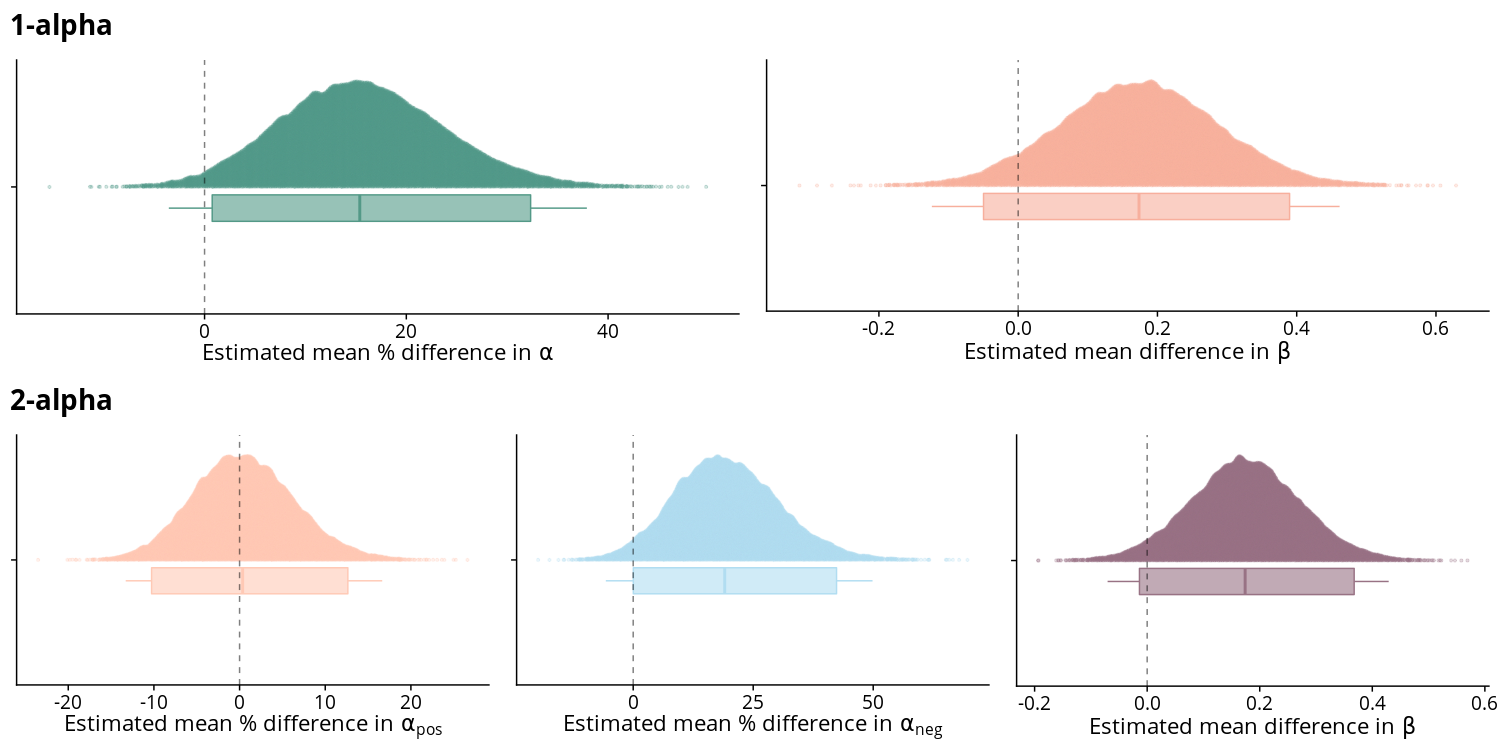

In [18]:
%%R -w 15 -h 7.5 --units in -r 100
dis_comp_1a_plt <- pstpipeline::plot_glm(
    dis_comp_1a_train, plot_var = "distanced", ovrll_title = "1-alpha", 
    title_font_size = 20, font = "Open Sans", font_size = 16,
    pal = train_1a_pal
)
dis_comp_2a_plt <- pstpipeline::plot_glm(
    dis_comp_2a_train, plot_var = "distanced", ovrll_title = "2-alpha", 
    title_font_size = 20, font = "Open Sans", font_size = 16,
    pal = train_2a_pal
)

cowplot::plot_grid(dis_comp_1a_plt, dis_comp_2a_plt, nrow = 2)

From the 1-alpha model, there is strong evidence that those in the distanced group have higher learning rates, indicating higher sensitivity to recent feedback (~40% higher on average). From the 2-alpha model, there is evidence that this may be driven specifically by higher sensitivity to recent negative feedback, as indicated by evidence of higher $\alpha_{neg}$ but not $\alpha_{pos}$ values, on average. 

In addition, inverse temperatures estimated from the 2-alpha model also appear to be higher in the distanced group. This suggest that distanced partipants are less stochastic in their choices, which can suggest one (or a combination) of three things:
* Clearer and more accurate representations of option values
* A favouring of accurate over speedy choices
* A tendency to exploit rather than explore

### Test

In [19]:
%%R
dis_comp_1a_test <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_1a_test, summary_dis_1a_test),
    raw_df = list(raw_df_nd_1a_test$test, raw_df_dis_1a_test$test),
    var_of_interest = "distanced",
    covariates = c("age", "sex", "digit_span"),
    iter_warmup = 2000, iter_sampling = 10000
)
dis_comp_2a_test <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a_test, summary_dis_2a_test),
    raw_df = list(raw_df_nd_2a_test$test, raw_df_dis_2a_test$test),
    var_of_interest = "distanced",
    covariates = c("age", "sex", "digit_span"),
    iter_warmup = 2000, iter_sampling = 10000
)

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.3 seconds.
Chain 2 finished in 6.3 seconds.
Chain 3 finished in 6.3 seconds.
Chain 4 finished in 6.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.4 seconds.
Total execution time: 6.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 3 finished in 1.3 seconds.
Chain 4 finished in 1.4 seconds.
Chain 2 finished in 1.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 1.8 seconds.


R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.8 seconds.
Chain 2 finished in 6.8 seconds.
Chain 4 finished in 6.8 seconds.
Chain 3 finished in 6.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.8 seconds.
Total execution time: 7.2 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.1 seconds.
Chain 3 finished in 6.1 seconds.
Chain 2 finished in 6.2 seconds.
Chain 4 finished in 6.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.2 seconds.
Total execution time: 6.5 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.3 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.3 seconds.
Chain 4 finished in 1.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.3 seconds.
Total execution time: 1.6 seconds.


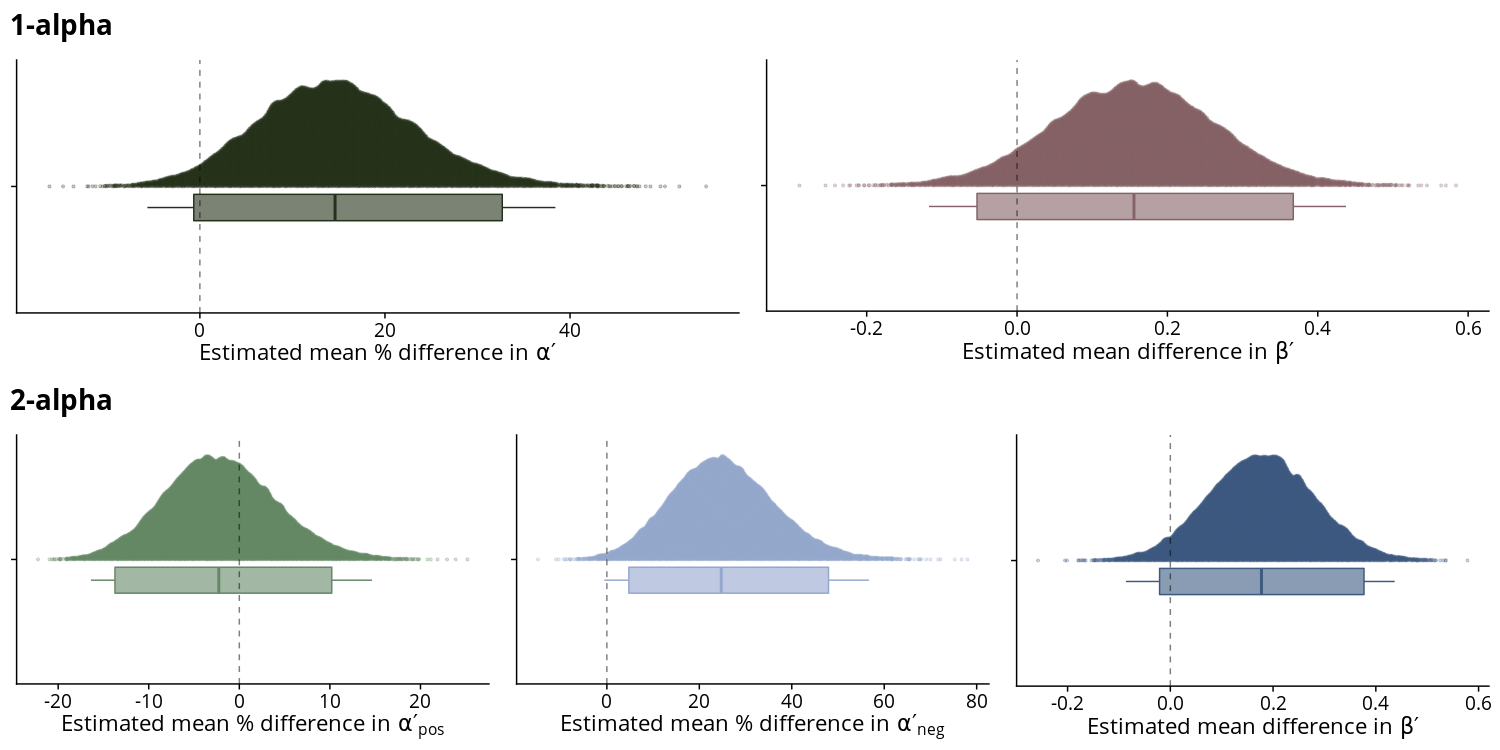

In [20]:
%%R -w 15 -h 7.5 --units in -r 100
dis_comp_1a_test_plt <- pstpipeline::plot_glm(
    dis_comp_1a_test, plot_var = "distanced", test = TRUE, 
    ovrll_title = "1-alpha", title_font_size = 20, font = "Open Sans", 
    font_size = 16, pal = test_1a_pal
)
dis_comp_2a_test_plt <- pstpipeline::plot_glm(
    dis_comp_2a_test, plot_var = "distanced", test = TRUE, 
    ovrll_title = "2-alpha", title_font_size = 20, font = "Open Sans", 
    font_size = 16, pal = test_2a_pal
)

cowplot::plot_grid(dis_comp_1a_test_plt, dis_comp_2a_test_plt, nrow = 2)

In [21]:
%%R
dis_comp_models <- list()
dis_comp_models$mod_1a_train <- dis_comp_1a_train
dis_comp_models$mod_2a_train <- dis_comp_2a_train
dis_comp_models$mod_1a_test <- dis_comp_1a_test
dis_comp_models$mod_2a_test <- dis_comp_2a_test
saveRDS(dis_comp_models, 'outputs/cmdstan/outcome_glms/dis_models.RDS')

Though the evidence for a higher learning rate substantially weakens in the 1-alpha model fit to test choices, the 2-alpha model fit to test choices indicates moderate evidence for both higher $\alpha'_{neg}$ and $\beta'$, with both 95% HDIs excluding 0. This suggests that, by the end of training, distanced participants are indeed more sensitive to negative feedback and less stochastic than non-distanced participants, on average, perhaps due to having more practice at self-distancing. 

## Interactions between distancing and other covariables

These are exploratory analyses meant to demonstrate how the package can be used to investigate other possibilities. 

### Antidepressant use (current)

#### Training

In [22]:
%%R
dis_comp_1a_train_antidep <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_1a, summary_dis_1a),
    raw_df = list(raw_df_nd_1a, raw_df_dis_1a),
    var_of_interest = "distanced",
    covariates = c("age", "sex", "digit_span"),
    interaction = "antidepressant",
    recode_na = 0, # NAs in raw data which should = 0
    iter_warmup = 2000, iter_sampling = 10000
)
dis_comp_2a_train_antidep <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a, summary_dis_2a),
    raw_df = list(raw_df_nd_2a, raw_df_dis_2a),
    var_of_interest = "distanced",
    covariates = c("age", "sex", "digit_span"),
    interaction = "antidepressant", 
    recode_na = 0,
    iter_warmup = 2000, iter_sampling = 10000
)

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 8.7 seconds.
Chain 3 finished in 9.0 seconds.
Chain 1 finished in 9.3 seconds.
Chain 4 finished in 9.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 9.1 seconds.
Total execution time: 9.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.7 seconds.
Chain 3 finished in 1.6 seconds.
Chain 2 finished in 1.7 seconds.
Chain 4 finished in 1.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.7 seconds.
Total execution time: 1.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 11.6 seconds.
Chain 1 finished in 12.8 seconds.
Chain 4 finished in 12.7 seconds.
Chain 3 finished in 13.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 12.7 seconds.
Total execution time: 13.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.9 seconds.
Chain 2 finished in 1.9 seconds.
Chain 3 finished in 1.9 seconds.
Chain 4 finished in 2.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.9 seconds.
Total execution time: 2.3 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 8.2 seconds.
Chain 1 finished in 9.4 seconds.
Chain 4 finished in 9.5 seconds.
Chain 2 finished in 9.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 9.2 seconds.
Total execution time: 9.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 7.5 seconds.
Chain 3 finished in 8.7 seconds.
Chain 4 finished in 8.6 seconds.
Chain 1 finished in 9.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 8.6 seconds.
Total execution time: 9.6 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.6 seconds.
Chain 2 finished in 1.6 seconds.
Chain 3 finished in 1.6 seconds.
Chain 4 finished in 1.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.6 seconds.
Total execution time: 1.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 11.2 seconds.
Chain 2 finished in 12.2 seconds.
Chain 3 finished in 12.4 seconds.
Chain 4 finished in 14.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 12.6 seconds.
Total execution time: 14.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 11.9 seconds.
Chain 1 finished in 12.7 seconds.
Chain 2 finished in 13.8 seconds.
Chain 3 finished in 14.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 13.2 seconds.
Total execution time: 14.5 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.9 seconds.
Chain 3 finished in 1.9 seconds.
Chain 2 finished in 2.1 seconds.
Chain 4 finished in 2.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 2.0 seconds.
Total execution time: 2.3 seconds.


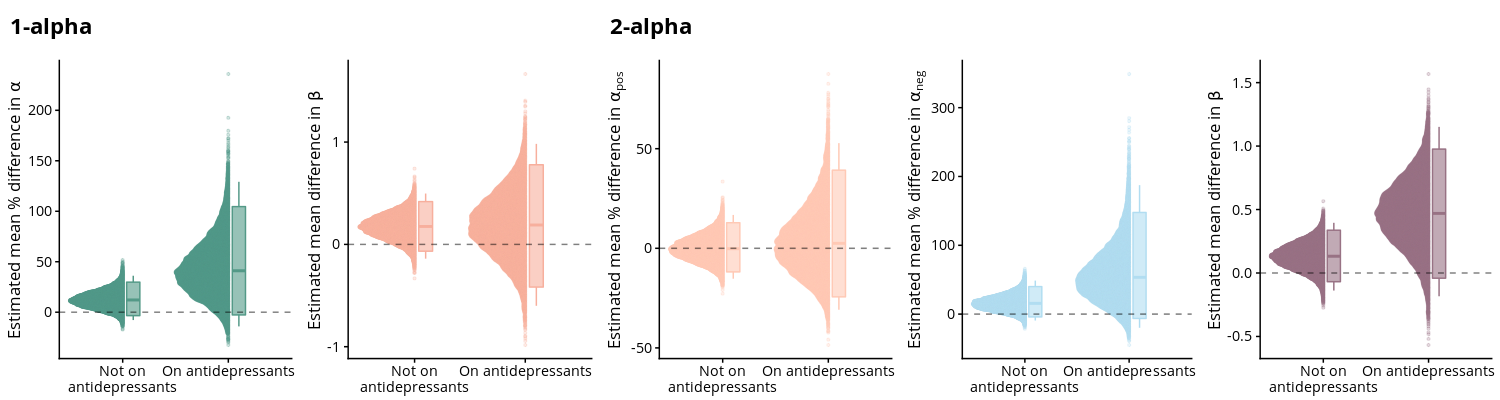

In [23]:
%%R -w 15 -h 4 --units in -r 100
dis_comp_1a_train_antidep_plt <- pstpipeline::plot_glm(
    dis_comp_1a_train_antidep, plot_var = "distanced", grp = "antidepressant", 
    grp_labs = c("Not on\nantidepressants", "On antidepressants"),
    ovrll_title = "1-alpha", top_right = FALSE, coord_flip = FALSE, 
    box_nudge = -0.1, font = "Open Sans", font_size = 12, 
    pal = train_1a_pal
)
dis_comp_2a_train_antidep_plt <- pstpipeline::plot_glm(
    dis_comp_2a_train_antidep, plot_var = "distanced", grp = "antidepressant", 
    grp_labs = c("Not on\nantidepressants", "On antidepressants"),
    ovrll_title = "2-alpha", top_right = FALSE, coord_flip = FALSE, 
    box_nudge = -0.1, font = "Open Sans", font_size = 12, 
    pal = train_2a_pal
)
cowplot::plot_grid(
    dis_comp_1a_train_antidep_plt, dis_comp_2a_train_antidep_plt, 
    rel_widths = c(2,3), nrow = 1
)

#### Test

In [24]:
%%R
dis_comp_1a_test_antidep <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_1a_test, summary_dis_1a_test),
    raw_df = list(raw_df_nd_1a_test$test, raw_df_dis_1a_test$test),
    var_of_interest = "distanced",
    covariates = c("age", "sex", "digit_span"),
    interaction = "antidepressant",
    recode_na = 0,
    iter_warmup = 2000, iter_sampling = 10000
)
dis_comp_2a_test_antidep <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a_test, summary_dis_2a_test),
    raw_df = list(raw_df_nd_2a_test$test, raw_df_dis_2a_test$test),
    var_of_interest = "distanced",
    covariates = c("age", "sex", "digit_span"),
    interaction = "antidepressant", 
    recode_na = 0,
    iter_warmup = 2000, iter_sampling = 10000
)

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 2 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 8.2 seconds.
Chain 1 finished in 8.5 seconds.
Chain 2 finished in 8.7 seconds.
Chain 3 finished in 9.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 8.7 seconds.
Total execution time: 9.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 1.4 seconds.
Chain 1 finished in 1.6 seconds.
Chain 3 finished in 1.6 seconds.
Chain 4 finished in 1.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.6 seconds.
Total execution time: 1.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 11.5 seconds.
Chain 2 finished in 11.8 seconds.
Chain 3 finished in 12.0 seconds.
Chain 1 finished in 15.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 12.6 seconds.
Total execution time: 15.1 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.9 seconds.
Chain 2 finished in 1.9 seconds.
Chain 3 finished in 2.0 seconds.
Chain 4 finished in 2.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 2.0 seconds.
Total execution time: 2.3 seconds.


R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 9.1 seconds.
Chain 1 finished in 10.0 seconds.
Chain 4 finished in 10.0 seconds.
Chain 3 finished in 10.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 9.8 seconds.
Total execution time: 10.4 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 8.7 seconds.
Chain 3 finished in 8.6 seconds.
Chain 4 finished in 8.8 seconds.
Chain 2 finished in 10.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 9.2 seconds.
Total execution time: 10.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.6 seconds.
Chain 2 finished in 1.5 seconds.
Chain 3 finished in 1.6 seconds.
Chain 4 finished in 1.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.6 seconds.
Total execution time: 2.1 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 12.1 seconds.
Chain 2 finished in 12.3 seconds.
Chain 4 finished in 13.9 seconds.
Chain 3 finished in 14.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 13.2 seconds.
Total execution time: 14.6 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 10.9 seconds.
Chain 1 finished in 11.7 seconds.
Chain 3 finished in 12.0 seconds.
Chain 4 finished in 12.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 11.8 seconds.
Total execution time: 12.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.9 seconds.
Chain 2 finished in 1.9 seconds.
Chain 4 finished in 1.9 seconds.
Chain 3 finished in 2.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.9 seconds.
Total execution time: 2.3 seconds.


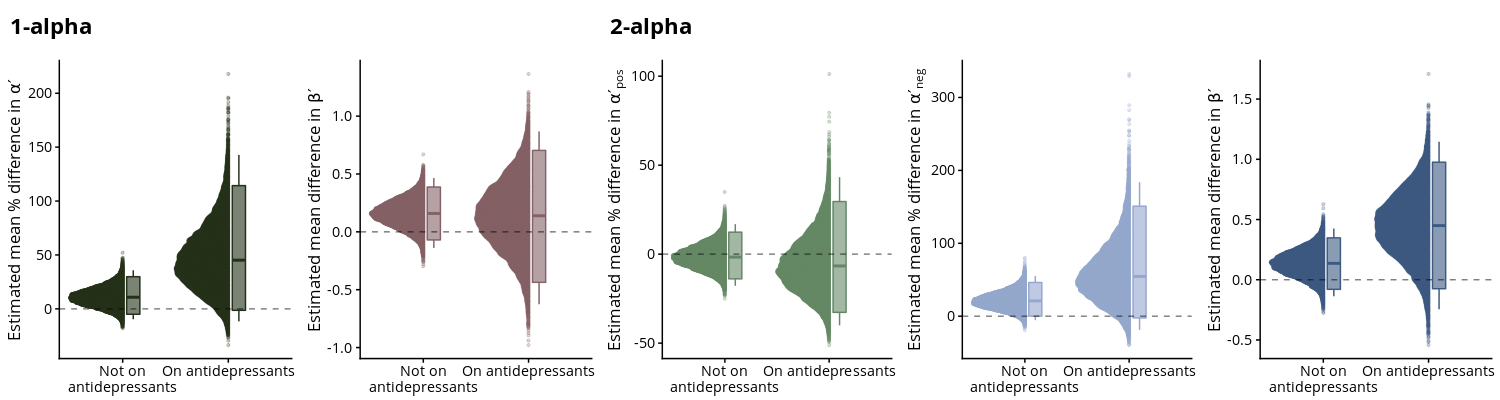

In [25]:
%%R -w 15 -h 4 --units in -r 100
dis_comp_1a_test_antidep_plt <- pstpipeline::plot_glm(
    dis_comp_1a_test_antidep, plot_var = "distanced", test = TRUE, grp = "antidepressant", 
    grp_labs = c("Not on\nantidepressants", "On antidepressants"), ovrll_title = "1-alpha", 
    top_right = FALSE, coord_flip = FALSE, box_nudge = -0.1, font = "Open Sans", font_size = 12,
    pal = test_1a_pal
)
dis_comp_2a_test_antidep_plt <- pstpipeline::plot_glm(
    dis_comp_2a_test_antidep, plot_var = "distanced", test = TRUE, grp = "antidepressant", 
    grp_labs = c("Not on\nantidepressants", "On antidepressants"), ovrll_title = "2-alpha", 
    top_right = FALSE, coord_flip = FALSE, box_nudge = -0.1, font = "Open Sans", font_size = 12,
    pal = test_2a_pal
)
cowplot::plot_grid(
    dis_comp_1a_test_antidep_plt, dis_comp_2a_test_antidep_plt, 
    rel_widths = c(2,3), nrow = 1
)

In models fit to both training and test data, there appears to be limited evidence of any difference in learning rates or inverse temperature in individuals (self-reporting) being on antidepressants at the time of the task, compared to those who were not.

### Transdiagnostic factors

To keep things simpler, we will focus on the "winning" 2$\alpha$ model for both the training and test phase.

#### Training

In [26]:
%%R
dis_comp_2a_train_AD <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a, summary_dis_2a),
    raw_df = list(raw_df_nd_2a, raw_df_dis_2a),
    var_of_interest = "AD",
    covariates = c("age", "sex", "digit_span"),
    interaction = "distanced",
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
dis_comp_2a_train_CB <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a, summary_dis_2a),
    raw_df = list(raw_df_nd_2a, raw_df_dis_2a),
    var_of_interest = "Compul",
    covariates = c("age", "sex", "digit_span"),
    interaction = "distanced",
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
dis_comp_2a_train_SW <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a, summary_dis_2a),
    raw_df = list(raw_df_nd_2a, raw_df_dis_2a),
    var_of_interest = "SW",
    covariates = c("age", "sex", "digit_span"),
    interaction = "distanced",
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 18.1 seconds.
Chain 3 finished in 18.1 seconds.
Chain 2 finished in 18.4 seconds.
Chain 4 finished in 19.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 18.5 seconds.
Total execution time: 19.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 17.7 seconds.
Chain 2 finished in 18.5 seconds.
Chain 3 finished in 18.7 seconds.
Chain 4 finished in 18.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 18.4 seconds.
Total execution time: 19.1 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 2.3 seconds.
Chain 3 finished in 2.3 seconds.
Chain 2 finished in 2.4 seconds.
Chain 4 finished in 2.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 2.4 seconds.
Total execution time: 2.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 17.0 seconds.
Chain 2 finished in 17.6 seconds.
Chain 1 finished in 18.4 seconds.
Chain 3 finished in 18.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 18.0 seconds.
Total execution time: 19.2 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 16.8 seconds.
Chain 2 finished in 17.0 seconds.
Chain 1 finished in 18.2 seconds.
Chain 4 finished in 18.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 17.6 seconds.
Total execution time: 18.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 2.4 seconds.
Chain 1 finished in 2.6 seconds.
Chain 3 finished in 2.4 seconds.
Chain 4 finished in 2.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 2.5 seconds.
Total execution time: 2.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 12.4 seconds.
Chain 3 finished in 12.6 seconds.
Chain 4 finished in 12.5 seconds.
Chain 2 finished in 12.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 12.6 seconds.
Total execution time: 13.0 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 13.0 seconds.
Chain 2 finished in 13.5 seconds.
Chain 4 finished in 13.9 seconds.
Chain 1 finished in 15.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 14.1 seconds.
Total execution time: 16.1 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 2.0 seconds.
Chain 2 finished in 2.1 seconds.
Chain 3 finished in 2.2 seconds.
Chain 4 finished in 2.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 2.1 seconds.
Total execution time: 2.6 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 12.4 seconds.
Chain 1 finished in 13.1 seconds.
Chain 3 finished in 13.0 seconds.
Chain 2 finished in 14.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 13.3 seconds.
Total execution time: 14.6 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 12.2 seconds.
Chain 1 finished in 13.1 seconds.
Chain 4 finished in 13.4 seconds.
Chain 2 finished in 13.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 13.1 seconds.
Total execution time: 13.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.8 seconds.
Chain 2 finished in 1.9 seconds.
Chain 4 finished in 2.0 seconds.
Chain 3 finished in 2.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.9 seconds.
Total execution time: 2.4 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 11.1 seconds.
Chain 1 finished in 11.3 seconds.
Chain 4 finished in 11.0 seconds.
Chain 3 finished in 11.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 11.1 seconds.
Total execution time: 11.5 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 10.6 seconds.
Chain 2 finished in 10.6 seconds.
Chain 3 finished in 10.8 seconds.
Chain 4 finished in 10.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 10.7 seconds.
Total execution time: 11.2 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.8 seconds.
Chain 2 finished in 1.8 seconds.
Chain 3 finished in 1.8 seconds.
Chain 4 finished in 1.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.8 seconds.
Total execution time: 2.2 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 11.4 seconds.
Chain 3 finished in 11.2 seconds.
Chain 2 finished in 11.5 seconds.
Chain 4 finished in 11.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 11.4 seconds.
Total execution time: 11.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 10.5 seconds.
Chain 3 finished in 10.9 seconds.
Chain 4 finished in 11.0 seconds.
Chain 1 finished in 11.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 11.0 seconds.
Total execution time: 11.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.7 seconds.
Chain 2 finished in 1.8 seconds.
Chain 3 finished in 1.8 seconds.
Chain 4 finished in 1.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.8 seconds.
Total execution time: 2.3 seconds.


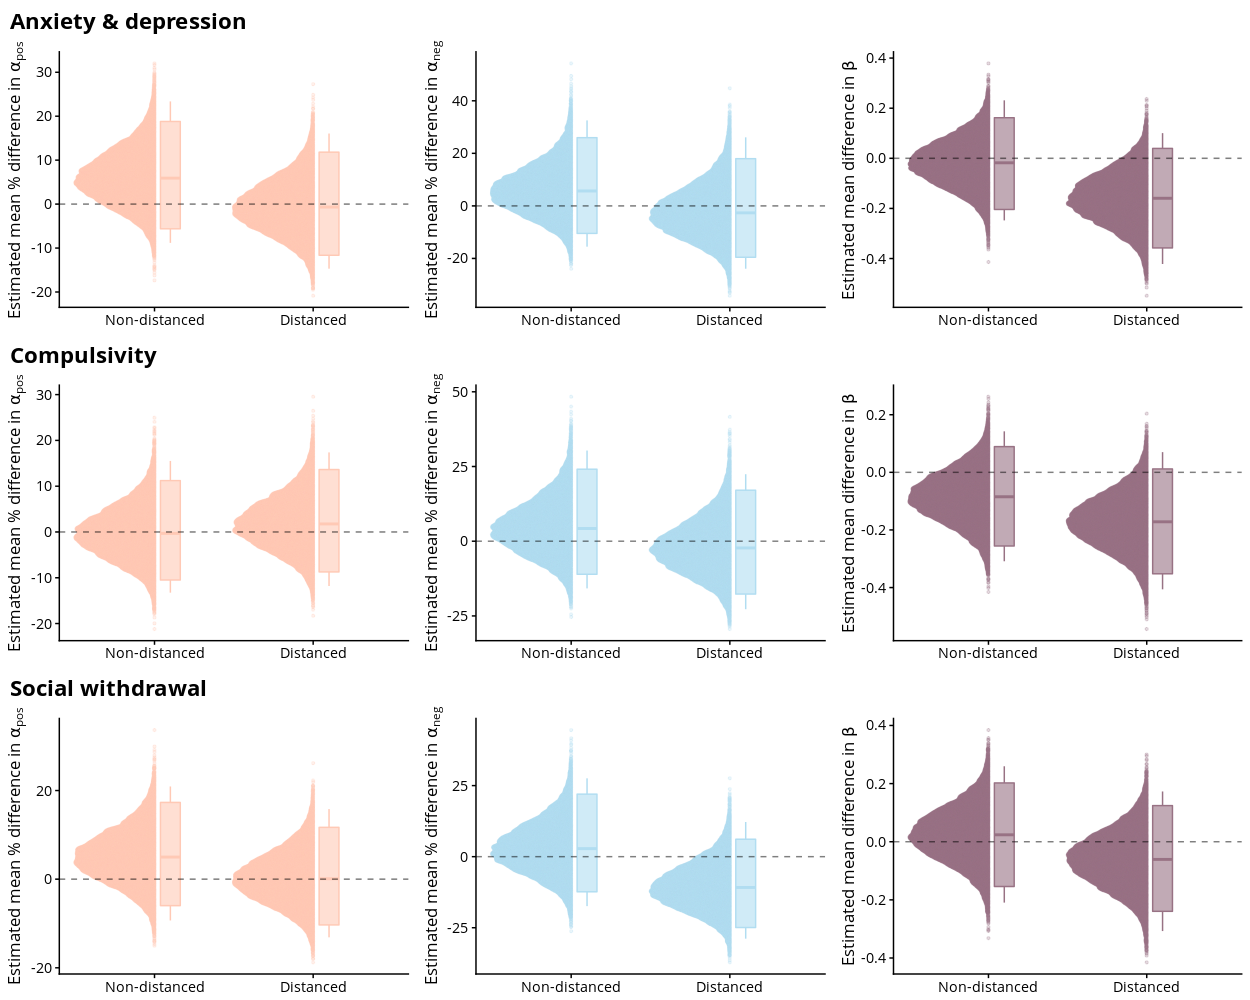

In [27]:
%%R -w 12.5 -h 10 --units in -r 100
dis_comp_2a_train_AD_plt <- pstpipeline::plot_glm(
    dis_comp_2a_train_AD, plot_var = "AD", grp = "distanced", ovrll_title = "Anxiety & depression", 
    grp_labs = c("Non-distanced", "Distanced"), top_right = FALSE, coord_flip = FALSE, 
    box_nudge = -0.1, font = "Open Sans", font_size = 12, pal = train_2a_pal
)
dis_comp_2a_train_CB_plt <- pstpipeline::plot_glm(
    dis_comp_2a_train_CB, plot_var = "Compul", grp = "distanced", ovrll_title = "Compulsivity", 
    grp_labs = c("Non-distanced", "Distanced"), top_right = FALSE, coord_flip = FALSE, 
    box_nudge = -0.1, font = "Open Sans", font_size = 12, pal = train_2a_pal
)
dis_comp_2a_train_SW_plt <- pstpipeline::plot_glm(
    dis_comp_2a_train_SW, plot_var = "SW", grp = "distanced", ovrll_title = "Social withdrawal", 
    grp_labs = c("Non-distanced", "Distanced"), top_right = FALSE, coord_flip = FALSE, 
    box_nudge = -0.1, font = "Open Sans", font_size = 12, pal = train_2a_pal
)
cowplot::plot_grid(
    dis_comp_2a_train_AD_plt, dis_comp_2a_train_CB_plt, dis_comp_2a_train_SW_plt, nrow = 3
)

#### Test

In [28]:
%%R
dis_comp_2a_test_AD <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a_test, summary_dis_2a_test),
    raw_df = list(raw_df_nd_2a_test$test, raw_df_dis_2a_test$test),
    var_of_interest = "AD",
    covariates = c("age", "sex", "digit_span"),
    interaction = "distanced",
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
dis_comp_2a_test_CB <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a_test, summary_dis_2a_test),
    raw_df = list(raw_df_nd_2a_test$test, raw_df_dis_2a_test$test),
    var_of_interest = "Compul",
    covariates = c("age", "sex", "digit_span"),
    interaction = "distanced",
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)
dis_comp_2a_test_SW <- pstpipeline::parameter_glm(
    summary_df = list(summary_nd_2a_test, summary_dis_2a_test),
    raw_df = list(raw_df_nd_2a_test$test, raw_df_dis_2a_test$test),
    var_of_interest = "SW",
    covariates = c("age", "sex", "digit_span"),
    interaction = "distanced",
    factor_scores = factor_scores,
    iter_warmup = 2000, iter_sampling = 10000
)

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 17.0 seconds.
Chain 1 finished in 17.9 seconds.
Chain 4 finished in 18.4 seconds.
Chain 2 finished in 19.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 18.1 seconds.
Total execution time: 19.5 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 15.7 seconds.
Chain 3 finished in 16.3 seconds.
Chain 1 finished in 16.8 seconds.
Chain 4 finished in 17.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 16.7 seconds.
Total execution time: 18.2 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 2.4 seconds.
Chain 2 finished in 2.4 seconds.
Chain 3 finished in 2.4 seconds.
Chain 4 finished in 2.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 2.4 seconds.
Total execution time: 2.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 17.7 seconds.
Chain 2 finished in 17.8 seconds.
Chain 3 finished in 18.4 seconds.
Chain 4 finished in 19.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 18.2 seconds.
Total execution time: 19.3 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 17.3 seconds.
Chain 1 finished in 17.8 seconds.
Chain 3 finished in 18.1 seconds.
Chain 2 finished in 18.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 17.9 seconds.
Total execution time: 18.5 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 2.5 seconds.
Chain 2 finished in 2.4 seconds.
Chain 3 finished in 2.3 seconds.
Chain 4 finished in 2.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 2.4 seconds.
Total execution time: 2.9 seconds.


R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 12.3 seconds.
Chain 2 finished in 13.7 seconds.
Chain 1 finished in 15.3 seconds.
Chain 4 finished in 17.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 14.7 seconds.
Total execution time: 17.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 11.8 seconds.
Chain 4 finished in 12.3 seconds.
Chain 1 finished in 12.5 seconds.
Chain 3 finished in 15.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 13.0 seconds.
Total execution time: 15.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.9 seconds.
Chain 2 finished in 2.1 seconds.
Chain 4 finished in 1.9 seconds.
Chain 3 finished in 2.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 2.1 seconds.
Total execution time: 2.6 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 12.2 seconds.
Chain 3 finished in 12.1 seconds.
Chain 4 finished in 13.6 seconds.
Chain 2 finished in 15.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 13.4 seconds.
Total execution time: 15.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 13.3 seconds.
Chain 2 finished in 13.2 seconds.
Chain 3 finished in 13.7 seconds.
Chain 4 finished in 14.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 13.7 seconds.
Total execution time: 14.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 2.2 seconds.
Chain 2 finished in 2.1 seconds.
Chain 4 finished in 2.0 seconds.
Chain 3 finished in 2.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 2.1 seconds.
Total execution time: 2.5 seconds.


R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 11.0 seconds.
Chain 3 finished in 11.3 seconds.
Chain 2 finished in 12.4 seconds.
Chain 4 finished in 12.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 11.8 seconds.
Total execution time: 12.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 4 finished in 9.8 seconds.
Chain 3 finished in 10.4 seconds.
Chain 1 finished in 10.7 seconds.
Chain 2 finished in 10.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 10.4 seconds.
Total execution time: 10.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.8 seconds.
Chain 2 finished in 1.9 seconds.
Chain 3 finished in 1.8 seconds.
Chain 4 finished in 1.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.8 seconds.
Total execution time: 2.2 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 10.6 seconds.
Chain 4 finished in 11.0 seconds.
Chain 2 finished in 11.4 seconds.
Chain 1 finished in 11.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 11.2 seconds.
Total execution time: 11.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 3 finished in 10.1 seconds.
Chain 1 finished in 10.8 seconds.
Chain 2 finished in 10.8 seconds.
Chain 4 finished in 10.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 10.7 seconds.
Total execution time: 11.3 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.8 seconds.
Chain 2 finished in 1.8 seconds.
Chain 3 finished in 1.8 seconds.
Chain 4 finished in 1.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.8 seconds.
Total execution time: 2.7 seconds.


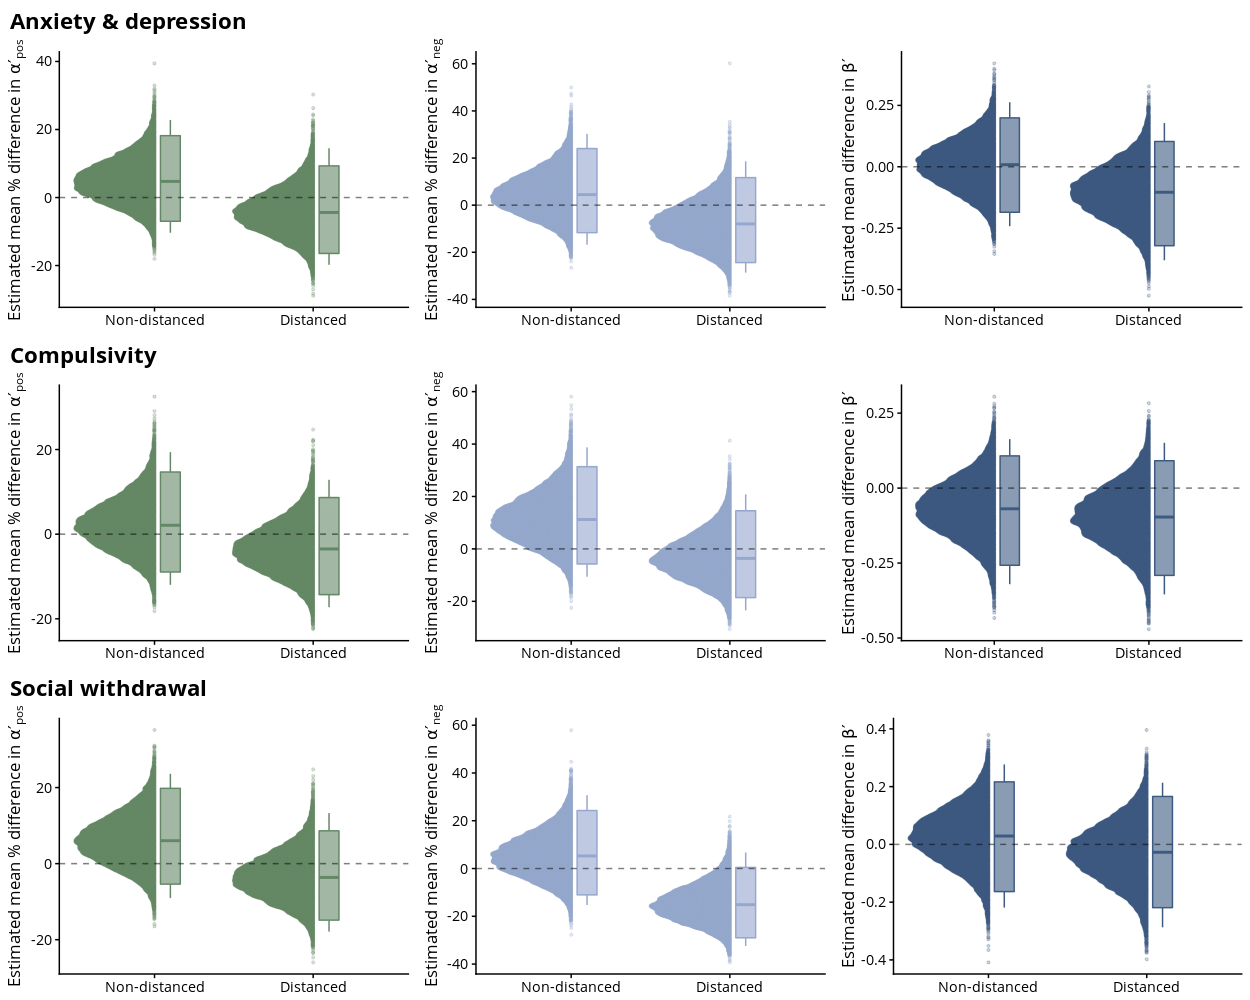

In [29]:
%%R -w 12.5 -h 10 --units in -r 100
dis_comp_2a_test_AD_plt <- pstpipeline::plot_glm(
    dis_comp_2a_test_AD, plot_var = "AD", grp = "distanced", ovrll_title = "Anxiety & depression", 
    grp_labs = c("Non-distanced", "Distanced"), top_right = FALSE, coord_flip = FALSE, 
    test = TRUE, box_nudge = -0.1, font = "Open Sans", font_size = 12, pal = test_2a_pal
)
dis_comp_2a_test_CB_plt <- pstpipeline::plot_glm(
    dis_comp_2a_test_CB, plot_var = "Compul", grp = "distanced", ovrll_title = "Compulsivity", 
    grp_labs = c("Non-distanced", "Distanced"), top_right = FALSE, coord_flip = FALSE, 
    test = TRUE, box_nudge = -0.1, font = "Open Sans", font_size = 12, pal = test_2a_pal
)
dis_comp_2a_test_SW_plt <- pstpipeline::plot_glm(
    dis_comp_2a_test_SW, plot_var = "SW", grp = "distanced", ovrll_title = "Social withdrawal", 
    grp_labs = c("Non-distanced", "Distanced"), top_right = FALSE, coord_flip = FALSE, 
    test = TRUE, box_nudge = -0.1, font = "Open Sans", font_size = 12, pal = test_2a_pal
)
cowplot::plot_grid(
    dis_comp_2a_test_AD_plt, dis_comp_2a_test_CB_plt, dis_comp_2a_test_SW_plt, nrow = 3
)

From these results, it seems that there is little evidence of a difference between the distanced and non-distanced participants in terms of associations between learning parameters and the transdiagnostic symptom dimensions.

In [30]:
%%R
dis_antidep_int <- list()
dis_antidep_int$train_1a <- dis_comp_1a_train_antidep
dis_antidep_int$train_2a <- dis_comp_2a_train_antidep
dis_antidep_int$test_1a <- dis_comp_1a_test_antidep
dis_antidep_int$test_2a <- dis_comp_2a_test_antidep
saveRDS(dis_antidep_int, "outputs/cmdstan/outcome_glms/dis_antidep_int_models.RDS")

dis_transdiag_int <- list()
dis_transdiag_int$AD_train_2a <- dis_comp_2a_train_AD
dis_transdiag_int$AD_test_2a <- dis_comp_2a_test_AD
dis_transdiag_int$CB_train_2a <- dis_comp_2a_train_CB
dis_transdiag_int$CB_test_2a <- dis_comp_2a_test_CB
dis_transdiag_int$SW_train_2a <- dis_comp_2a_train_SW
dis_transdiag_int$SW_test_2a <- dis_comp_2a_test_SW
saveRDS(dis_transdiag_int, "outputs/cmdstan/outcome_glms/dis_transdiag_int_models.RDS")

## Association between learning parameters and distancing: when does it emerge?

This final analysis is somewhat exploratory, aiming to understand at what stage of the task the two groups appear to diverge. To do so, we sequentially fit models to training data from increasing numbers of blocks (i.e, block 1, block 1-2, block 1-3, etc.).

In [31]:
%%R
all_res_split <- readRDS("data-raw/all_res_split.RDS")
dir.create("outputs/cmdstan/compare_blocks")

comp_dis_blocks_2a <- pstpipeline::compare_block_diffs(
    all_res_split, 
    var_of_interest = "distanced",
    covariates = c("age", "sex", "digit_span"),
    model = "2a", 
    vb = FALSE,
    out_dir = "outputs/cmdstan/compare_blocks",
    iter_warmup = 4000, 
    iter_sampling = 10000, # to save time 
    adapt_delta = 0.9, 
    step_size = 1, 
    max_treedepth = 10,
    iter_warmup_glm = 2000,
    iter_sampling_glm = 10000,
    refresh = 0
)

R[write to console]: Compiling Stan program...



R[write to console]: Getting initial values from variational inference...



Finished in  14.5 seconds.
Running MCMC with 4 parallel chains...

Chain 4 finished in 2803.0 seconds.
Chain 1 finished in 3302.1 seconds.
Chain 3 finished in 4390.7 seconds.
Chain 2 finished in 4423.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 3729.8 seconds.
Total execution time: 4423.5 seconds.


R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  14.1 seconds.
Running MCMC with 4 parallel chains...

Chain 1 finished in 4337.1 seconds.
Chain 3 finished in 4342.8 seconds.
Chain 2 finished in 4362.1 seconds.
Chain 4 finished in 4452.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 4373.5 seconds.
Total execution time: 4453.2 seconds.


R[write to console]: Compiling Stan program...



Running MCMC with 4 parallel chains...|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/-\|/

Chain 2 finished in 6.5 seconds.
Chain 1 finished in 6.9 seconds.
Chain 3 finished in 7.0 seconds.
Chain 4 finished in 6.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.8 seconds.
Total execution time: 7.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.7 seconds.
Chain 2 finished in 6.8 seconds.
Chain 3 finished in 6.9 seconds.
Chain 4 finished in 6.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.8 seconds.
Total execution time: 7.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.3 seconds.
Chain 2 finished in 1.3 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 2.3 seconds.


R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  31.3 seconds.
Running MCMC with 4 parallel chains...

Chain 1 finished in 11103.7 seconds.
Chain 2 finished in 11171.3 seconds.
Chain 4 finished in 11178.7 seconds.
Chain 3 finished in 11385.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 11209.7 seconds.
Total execution time: 11386.0 seconds.


R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  26.6 seconds.
Running MCMC with 4 parallel chains...

Chain 2 finished in 10496.8 seconds.
Chain 4 finished in 10746.1 seconds.
Chain 1 finished in 10955.9 seconds.
Chain 3 finished in 11093.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 10823.1 seconds.
Total execution time: 11094.4 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.7 seconds.
Chain 2 finished in 6.8 seconds.
Chain 3 finished in 7.0 seconds.
Chain 4 finished in 6.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.8 seconds.
Total execution time: 7.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.9 seconds.
Chain 2 finished in 6.6 seconds.
Chain 3 finished in 6.9 seconds.
Chain 4 finished in 6.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.8 seconds.
Total execution time: 7.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.3 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.3 seconds.
Chain 4 finished in 1.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 2.7 seconds.


R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  77.7 seconds.
Running MCMC with 4 parallel chains...

Chain 1 finished in 17811.3 seconds.
Chain 3 finished in 18044.7 seconds.
Chain 4 finished in 18119.5 seconds.
Chain 2 finished in 18154.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 18032.6 seconds.
Total execution time: 18155.6 seconds.


R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  39.4 seconds.
Running MCMC with 4 parallel chains...

Chain 4 finished in 16781.5 seconds.
Chain 3 finished in 16819.3 seconds.
Chain 1 finished in 16850.2 seconds.
Chain 2 finished in 16991.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 16860.6 seconds.
Total execution time: 16992.3 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 2 finished in 6.5 seconds.
Chain 1 finished in 6.9 seconds.
Chain 3 finished in 6.8 seconds.
Chain 4 finished in 6.6 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.7 seconds.
Total execution time: 7.3 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.9 seconds.
Chain 2 finished in 6.8 seconds.
Chain 3 finished in 6.9 seconds.
Chain 4 finished in 7.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.9 seconds.
Total execution time: 7.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.3 seconds.
Chain 2 finished in 1.4 seconds.
Chain 4 finished in 1.3 seconds.
Chain 3 finished in 1.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 2.0 seconds.


R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  87.5 seconds.
Running MCMC with 4 parallel chains...

Chain 2 finished in 25423.6 seconds.
Chain 4 finished in 36475.3 seconds.
Chain 1 finished in 41489.5 seconds.
Chain 3 finished in 41665.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 36263.4 seconds.
Total execution time: 41666.2 seconds.


R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  52.6 seconds.
Running MCMC with 4 parallel chains...

Chain 2 finished in 24283.5 seconds.
Chain 1 finished in 24348.8 seconds.
Chain 4 finished in 24540.0 seconds.
Chain 3 finished in 24577.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 24437.4 seconds.
Total execution time: 24578.4 seconds.


R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.9 seconds.
Chain 2 finished in 6.7 seconds.
Chain 3 finished in 6.7 seconds.
Chain 4 finished in 6.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.8 seconds.
Total execution time: 7.8 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.6 seconds.
Chain 2 finished in 6.5 seconds.
Chain 4 finished in 6.3 seconds.
Chain 3 finished in 6.7 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.5 seconds.
Total execution time: 7.4 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.4 seconds.
Chain 2 finished in 1.4 seconds.
Chain 3 finished in 1.3 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 2.4 seconds.


R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  65.7 seconds.
Running MCMC with 4 parallel chains...

Chain 1 finished in 35332.4 seconds.
Chain 4 finished in 55346.7 seconds.
Chain 3 finished in 55473.2 seconds.
Chain 2 finished in 55686.3 seconds.

All 4 chains finished successfully.
Mean chain execution time: 50459.7 seconds.
Total execution time: 55687.4 seconds.


R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  63.1 seconds.
Running MCMC with 4 parallel chains...

Chain 2 finished in 32132.3 seconds.
Chain 3 finished in 34130.5 seconds.
Chain 1 finished in 51072.6 seconds.
Chain 4 finished in 52459.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 42448.6 seconds.
Total execution time: 52460.8 seconds.


R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.8 seconds.
Chain 2 finished in 6.8 seconds.
Chain 3 finished in 6.7 seconds.
Chain 4 finished in 6.8 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.8 seconds.
Total execution time: 7.7 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.1 seconds.
Chain 2 finished in 6.4 seconds.
Chain 3 finished in 6.2 seconds.
Chain 4 finished in 6.2 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.2 seconds.
Total execution time: 7.1 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.5 seconds.
Chain 2 finished in 1.5 seconds.
Chain 3 finished in 1.3 seconds.
Chain 4 finished in 1.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 2.3 seconds.


R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  91.1 seconds.
Running MCMC with 4 parallel chains...

Chain 3 finished in 70203.9 seconds.
Chain 1 finished in 70449.9 seconds.
Chain 4 finished in 71070.2 seconds.
Chain 2 finished in 71143.4 seconds.

All 4 chains finished successfully.
Mean chain execution time: 70716.8 seconds.
Total execution time: 71145.0 seconds.


R[write to console]: Model executable is up to date!

R[write to console]: Getting initial values from variational inference...



Finished in  77.3 seconds.
Running MCMC with 4 parallel chains...

Chain 3 finished in 65126.7 seconds.
Chain 2 finished in 65504.3 seconds.
Chain 4 finished in 65600.9 seconds.
Chain 1 finished in 65606.0 seconds.

All 4 chains finished successfully.
Mean chain execution time: 65459.5 seconds.
Total execution time: 65607.1 seconds.


R[write to console]: 1 individual(s) dropped due to high rhat and/or low bulk ESS.

R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.6 seconds.
Chain 2 finished in 6.7 seconds.
Chain 3 finished in 6.8 seconds.
Chain 4 finished in 6.9 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.8 seconds.
Total execution time: 7.9 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 6.4 seconds.
Chain 2 finished in 6.2 seconds.
Chain 3 finished in 6.2 seconds.
Chain 4 finished in 6.1 seconds.

All 4 chains finished successfully.
Mean chain execution time: 6.2 seconds.
Total execution time: 7.2 seconds.


R[write to console]: Model executable is up to date!



Running MCMC with 4 parallel chains...

Chain 1 finished in 1.3 seconds.
Chain 2 finished in 1.3 seconds.
Chain 3 finished in 1.4 seconds.
Chain 4 finished in 1.5 seconds.

All 4 chains finished successfully.
Mean chain execution time: 1.4 seconds.
Total execution time: 2.5 seconds.


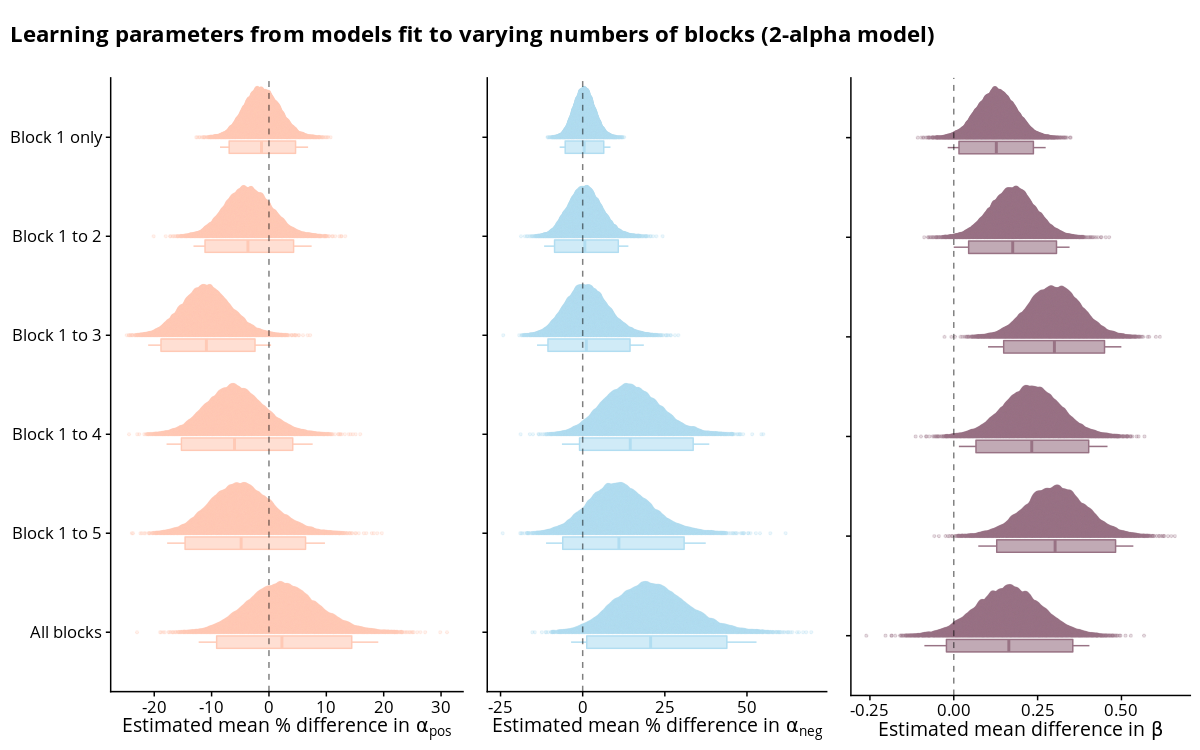

In [32]:
%%R -w 12 -h 7.5 --units in -r 100
comp_dis_blocks_2a_plt <- pstpipeline::plot_glm(
    comp_dis_blocks_2a, plot_var = "distanced", grp = "block_group", 
    ovrll_title = "Learning parameters from models fit to varying numbers of blocks (2-alpha model)", 
    title_font_size = 16, title_rel_ht = c(0.1, 1), plt_rel_widths = c(1.3, 1, 1),
    font = "Open Sans", font_size = 14, pal = train_2a_pal
)
comp_dis_blocks_2a_plt

In [33]:
%%R
saveRDS(comp_dis_blocks_2a, "outputs/cmdstan/compare_blocks/comp_dis_blocks_2a.RDS")